In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
cols = ['Undergrad','Marital.Status','Urban']
df[cols] = df[cols].apply(le.fit_transform)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [7]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


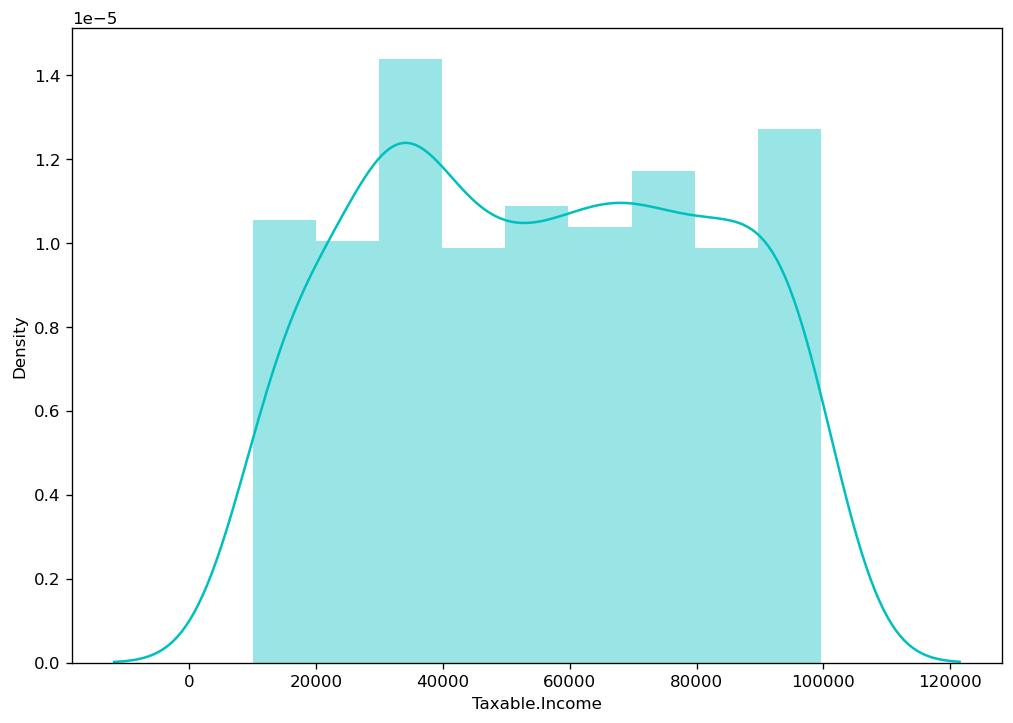

In [8]:
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.dpi'] = (120)

ax = sns.distplot(df['Taxable.Income'], kde = True, color='c')

In [9]:
corr = df.corr()

<AxesSubplot:>

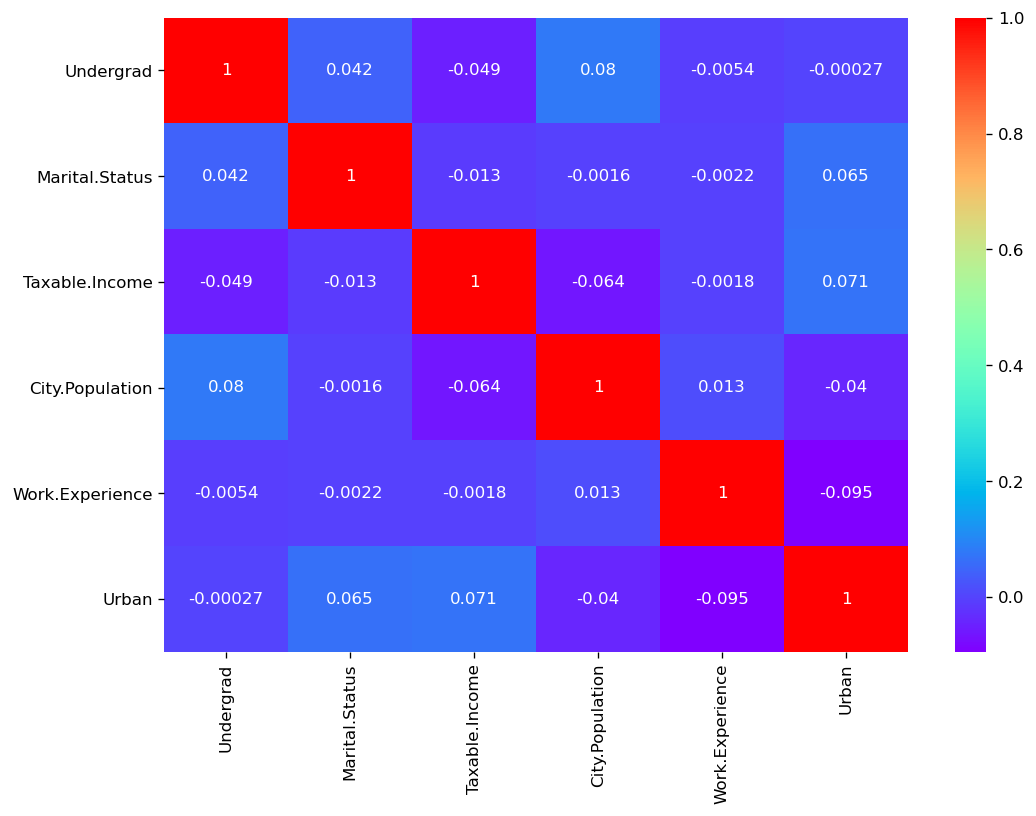

In [10]:
sns.heatmap(corr,annot=True, cmap='rainbow')

In [11]:
def split(i):
    if i <= 30000:
        return 'Risky'
    else:
        return 'Good'

In [12]:
df['Taxable.Income'] = df['Taxable.Income'].apply(split)

In [13]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

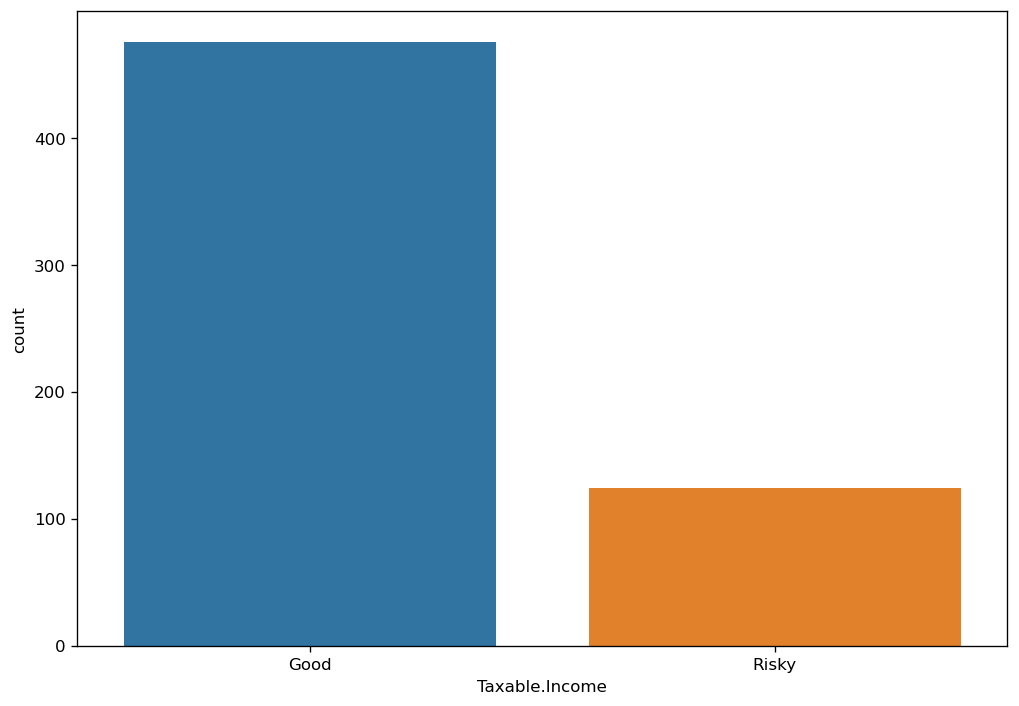

In [14]:
sns.countplot(df['Taxable.Income'])

In [15]:
df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

- As we can see that our target variable is imbalanced.
- We will handle this imbalanced data using SMOTE.

In [16]:
x = df[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
y = df['Taxable.Income']

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
sm = SMOTE(sampling_strategy='minority', random_state=45)

In [19]:
x_res,y_res = sm.fit_sample(x,y)
res_df = pd.concat([pd.DataFrame(y_res), pd.DataFrame(x_res)], axis=1)

In [20]:
res_df['Taxable.Income'].value_counts()

Good     476
Risky    476
Name: Taxable.Income, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

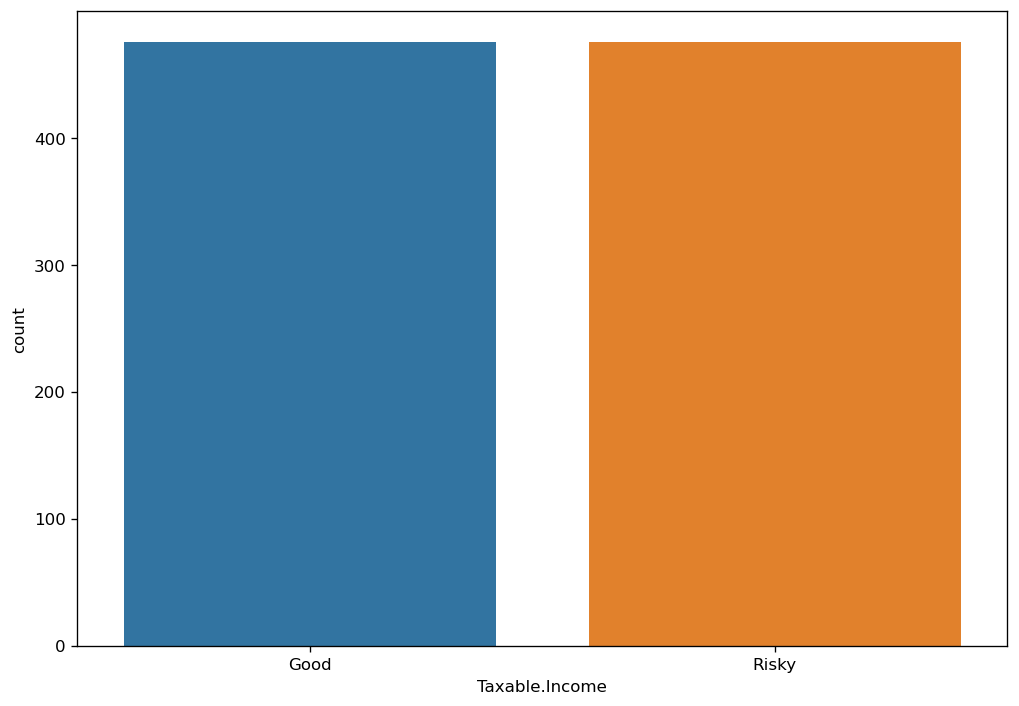

In [21]:
sns.countplot(res_df['Taxable.Income'])

## MODEL BUILDING

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size = 0.2)

In [23]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import f1_score

In [25]:
print('The accuracy score is: ',accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------------------------')
print('Classification report : ', classification_report(y_test,y_pred))
print('-------------------------------------------------------------------------------')
print('Confusion Matrix : ', confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------')


The accuracy score is:  0.643979057591623
-------------------------------------------------------------------------------
Classification report :                precision    recall  f1-score   support

        Good       0.64      0.58      0.61        91
       Risky       0.65      0.70      0.67       100

    accuracy                           0.64       191
   macro avg       0.64      0.64      0.64       191
weighted avg       0.64      0.64      0.64       191

-------------------------------------------------------------------------------
Confusion Matrix :  [[53 38]
 [30 70]]
-------------------------------------------------------------------------------


In [26]:
model.feature_importances_

array([0.03769179, 0.07146007, 0.58279681, 0.25871694, 0.04933439])

In [28]:
feature_imp = pd.DataFrame({'feature': list(x_train.columns),
                   'importance':model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_imp

,feature,importance
2,City.Population,0.582797
3,Work.Experience,0.258717
1,Marital.Status,0.071460
4,Urban,0.049334
0,Undergrad,0.037692


**CITY POPULATION IS THE MOST IMPORTANT FEATURE IN THE DATA**